# Importing Necessary Packages

In [1]:
import numpy as np
import time
import cv2
import os

# Installing necessary files

In [2]:
!wget https://www.dropbox.com/s/h5piyms4hj3h9sz/coco.names
!wget https://www.dropbox.com/s/xhi3lh1rvy7celd/yolov3.weights
!wget https://www.dropbox.com/s/lb84ueim858rn6v/yolov3.cfg

--2023-06-16 05:56:34--  https://www.dropbox.com/s/h5piyms4hj3h9sz/coco.names
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/h5piyms4hj3h9sz/coco.names [following]
--2023-06-16 05:56:34--  https://www.dropbox.com/s/raw/h5piyms4hj3h9sz/coco.names
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c7d8bb1872471fd84cd217091.dl.dropboxusercontent.com/cd/0/inline/B-FB6vCHmSMmIhGY1EyRE1nfO_L-yvoHc6HLUtMnRypCKfjdmblaVtAubN0JES7qHcAzbr7WX2VIN6Cuml-pVMThNToYuad8LmxBVniHgwK8QPXkzJi900SNcgF9yGQ_8tz2tqs5R2GvnB4QWKHaWqF5PDM6md5IgFTjcipsA3I5Fw/file# [following]
--2023-06-16 05:56:35--  https://uc0c7d8bb1872471fd84cd217091.dl.dropboxusercontent.com/cd/0/inline/B-FB6vCHmSMmIhGY1EyRE1nfO_L-yvoHc6HLUtMnRypCKfjdmblaVtAubN0JES7qHcAzbr7WX2VIN6Cuml-

In [3]:
weights = 'yolov3.weights'
config = 'yolov3.cfg'

# Making Yolo Model

In [4]:
yolo = cv2.dnn.readNetFromDarknet(config,weights)

# Getting list of classes on which Yolo is trained

In [5]:
classes = []
with open('coco.names','r') as file:
  classes = [line.strip() for line in file.readlines()]

In [6]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
len(classes)  ## Yolo is trained on 80 categories, the object which are outside this class are not able to get detected by Yolo

80

In [8]:
np.random.seed(42)           ## here we are using seed value so that our value for color does not changes every time we run this code
color = np.random.uniform(0,255,size = (len(classes),3))  ## color for different object bounding box (RGB)

In [9]:
color

array([[ 95.50773031, 242.43214813, 186.65845516],
       [152.65791347,  39.78475331,  39.77860269],
       [ 14.8113211 , 220.87491717, 153.28432799],
       [180.55850734,   5.24904605, 247.3270123 ],
       [212.2728734 ,  54.14647322,  46.36536664],
       [ 46.76815001,  77.58177195, 133.81289007],
       [110.14597975,  74.26343075, 156.02248815],
       [ 35.57093447,  74.49688538,  93.42227004],
       [116.29784598, 200.21987016,  50.91681445],
       [131.1297818 , 151.06571506,  11.84485524],
       [154.92393723,  43.48365154,  16.58815621],
       [241.965812  , 246.23616843, 206.14132377],
       [ 77.67651114,  24.90638907, 174.47942176],
       [112.2388859 ,  31.11974989, 126.27011208],
       [  8.76907288, 231.87670253,  65.98889531],
       [168.94318251,  79.4863244 , 132.6173454 ],
       [139.41112123,  47.13788616, 247.24408008],
       [197.65886996, 239.5722301 , 228.18097436],
       [152.4644946 , 235.07792993,  22.56558802],
       [ 49.97562992,  11.53295

# Reading Image

In [10]:
image = cv2.imread('/content/img.jpg')   ## function to read image

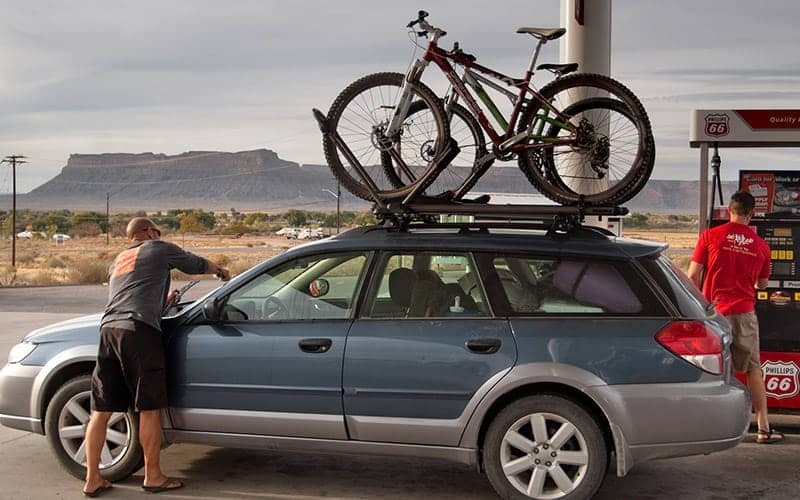

In [11]:
from google.colab.patches import cv2_imshow    ## function to display image
height,width = image.shape[0:2]
cv2_imshow(image)

# Converting Image to Blob format

In [12]:
## Yolo takes input in binary large object(Blob) format so we have to convert image to blob
blob = cv2.dnn.blobFromImage(image,1/255,(416,416),True,crop = False)   ## we convert image to blob and normalize it by dividing with 255,True denote that image is in RGB format

# Defining Input and Output of Yolo Model

In [13]:
yolo.setInput(blob)  ## Set blob as input and prepare network for forward pass and losses for boxes and classes are fixed in backpropogation
output_layers_name = yolo.getUnconnectedOutLayersNames()
layer_output = yolo.forward(output_layers_name)  ## forward function do forward pass of blob to get output

In [14]:
output_layers_name  ##  this are output layers name that produces final prediction
## we have three layer because it give predection for blob at different scale , so it can handle small as well as big images

('yolo_82', 'yolo_94', 'yolo_106')

In [15]:
layer_output  ## This is output of yolo model consisting of dim of bounding boxes , prob of presence of object in a grid and prob of different classes

(array([[0.04567235, 0.03087865, 0.2904952 , ..., 0.        , 0.        ,
         0.        ],
        [0.05223463, 0.03415566, 0.23093422, ..., 0.        , 0.        ,
         0.        ],
        [0.05376963, 0.02764032, 0.93550724, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9512291 , 0.9509423 , 0.48971054, ..., 0.        , 0.        ,
         0.        ],
        [0.95913064, 0.9672089 , 0.33832738, ..., 0.        , 0.        ,
         0.        ],
        [0.97060174, 0.9676691 , 0.84189916, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.0265424 , 0.02382763, 0.05999975, ..., 0.        , 0.        ,
         0.        ],
        [0.01905386, 0.0250006 , 0.22937201, ..., 0.        , 0.        ,
         0.        ],
        [0.02706975, 0.01867256, 0.0943844 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97517115, 0.97699636, 0.04220348, ..., 0.        , 0.        ,
         0.        

In [16]:
boxes =[]
confidences =[]
class_ids =[]
for output in layer_output:
  for detection in output:
    scores = detection[5:]  ## gives probability value of all 80 classes
    class_id = np.argmax(scores)   ## gives the name of categories with highest probability value
    confidence = scores[class_id]
    if confidence >0.5:
      # Scaling dimensions back to original
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)
      # Finding top left corner coordinate to use it for nms
      x = int(center_x -w/2)
      y = int(center_y -h/2)
      boxes.append([x,y,w,h])   ## Consist of all boxes coordinate of detected object
      confidences.append(float(confidence))  ## Consist of all max confidence for a category in a grid
      class_ids.append(class_id)  ## Consist of id of category with max prob value

In [17]:
len(class_ids) , len(class_ids) , len(confidences)  ## here we have detected 21 bounding boxes with its confidence and class id in our image

(21, 21, 21)

# Non Max Seperation (NMS)

In [18]:
indexes = cv2.dnn.NMSBoxes(boxes , confidences , 0.5 , 0.5) ## This consist of IoU and confidence score for bounding boxes

In [19]:
indexes  ## It gives us index of boxes after NMS (In this figure we have 4 object so we got 4 indexes)

array([ 6, 13, 18,  0], dtype=int32)

# Drawing Bounding Boxes for above detected object

In [20]:
font = cv2.FONT_HERSHEY_PLAIN

for i in range(len(boxes)):
  if i in indexes:
    x,y,w,h = boxes[i]
    label = classes[class_ids[i]]
    colors = color[class_ids[i]]
    conf = confidences[i]
    text = f'{label}:{conf:.2f}'
    cv2.rectangle(image , (x,y),(x+w,y+h),colors,2)
    cv2.putText(image,text,(x,y-5),font,1,colors,2)

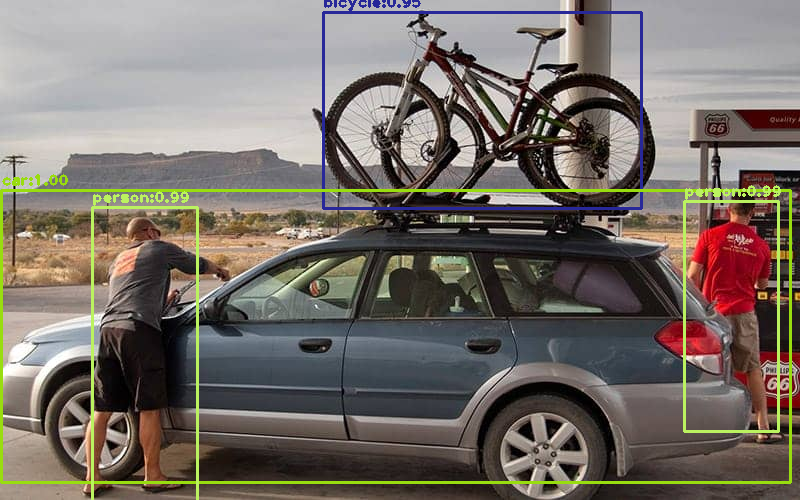

In [21]:
cv2_imshow(image)